Oasis Infobyte Internship

Intern: Shruti Jain

Domain: Data Science

Task 5

Sales Prediction

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

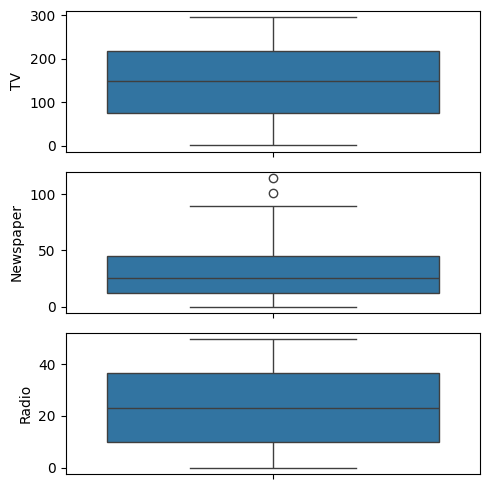

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

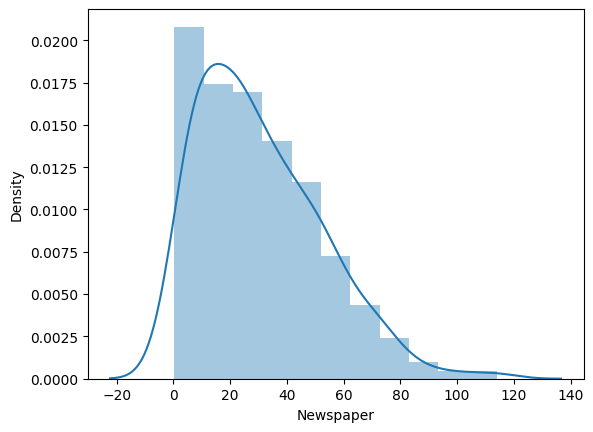

In [12]:
sns.distplot(df['Newspaper'])

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [14]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [15]:
data = df.copy()

In [16]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: ylabel='Newspaper'>

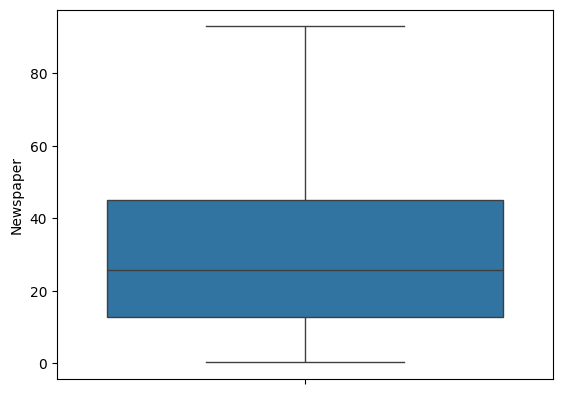

In [17]:
sns.boxplot(data['Newspaper'])

<Axes: ylabel='Sales'>

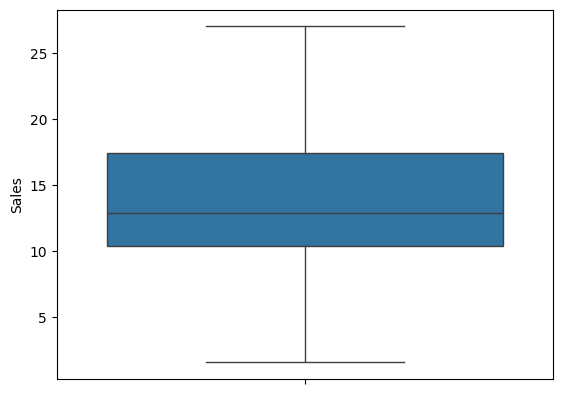

In [18]:
sns.boxplot(data['Sales'])

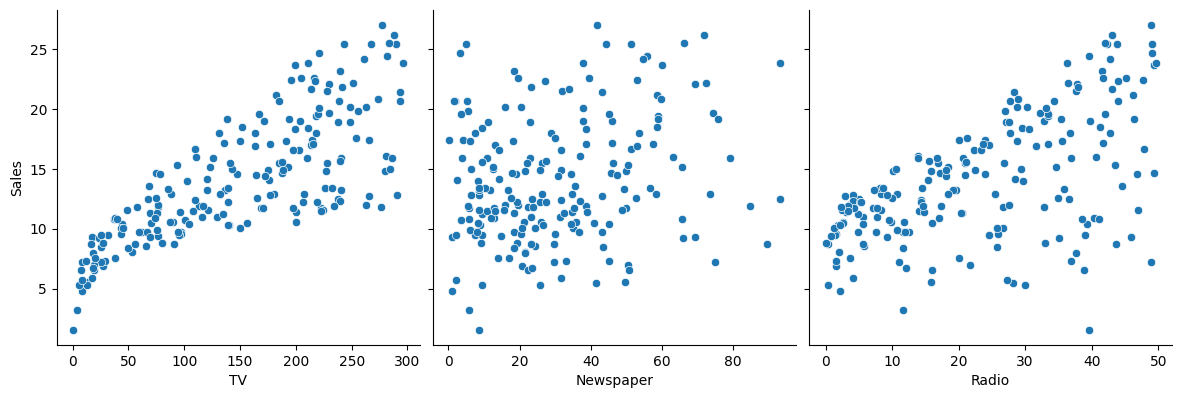

In [19]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

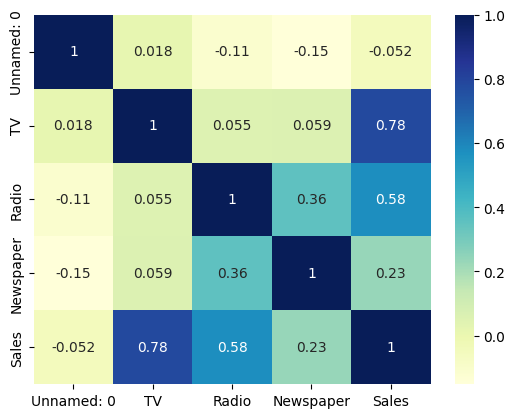

In [20]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [21]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [22]:
print(important_features)

['TV', 'Radio', 'Sales']


In [23]:
X = data['TV']
Y = data['Sales']

In [24]:
X = X.values.reshape(-1,1)

In [25]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(X.shape,Y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33)

In [29]:
print(X_train.shape,Y_train.shape)

(134, 1) (134,)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
knn = KNeighborsRegressor().fit(X_train, Y_train)

In [32]:
knn

KNeighborsRegressor()

In [33]:
knn_train_pred = knn.predict(X_train)

In [34]:
knn_test_pred = knn.predict(X_test)

In [35]:
print(knn_train_pred, knn_test_pred)

[18.38 16.82 10.88  9.56 18.54 15.54 17.2  17.02 15.92 17.02 14.88 18.14
  8.18 17.52  8.64  9.56 16.56 13.36  8.64 16.26 18.76 18.58 17.56  8.22
 15.54 10.18 18.24 12.36 15.16 12.16  8.64  8.66 15.76 18.06 19.6  10.86
  8.4   5.26 14.9  17.02 12.16 18.54 18.38 12.86 16.42 14.14 19.26 16.82
 18.54 17.8  18.14 11.18 19.26 12.36 15.16  9.72 17.76  8.22  5.96 13.36
 19.68 15.16  5.96 17.62 12.16 13.26  5.96 18.9  17.66 19.6  11.84  8.2
 11.1   9.66 18.54  4.44  9.72 11.62  9.66  5.96 11.26  9.92  9.92 14.04
  8.64 17.78  9.8  13.26  5.96  8.22 17.46 17.   13.38 18.24  9.54 11.62
 17.02 13.36 13.84 10.42 14.16 17.66  9.68 14.58 11.8  12.86 17.66 19.26
  9.8  14.6  18.24 11.42 13.84 19.78 11.1  15.92 17.02 16.56 17.62 15.92
 14.6   4.44 13.8  14.5  18.76 11.18 16.82 16.86 18.38 11.42 12.44 13.46
 10.9  10.18] [16.82 17.46 14.6  15.54 17.86 19.26 19.78 17.8  11.62 12.16  8.22 15.76
 19.16  8.22 19.18  8.22 17.76 15.08 17.46  5.96 17.76 17.04 12.36 13.46
 18.9  11.62 14.6  18.9   9.74 18.02 1

In [36]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSE','Variance'])

In [42]:
r2 = r2_score(Y_test,knn_test_pred)
r2_train = r2_score(Y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2: ',r2)
print('RMSE: ',rmse)

R2:  0.5943023224058726
RMSE:  3.4450069270282646


In [43]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.623732,0.594302,3.445007,0.029429


In [44]:
svr = SVR().fit(X_train,Y_train)
svr

SVR()

In [45]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [46]:
print(svr_train_pred,svr_test_pred)

[17.4884371  16.10914753 11.731517    9.39222807 16.69974131 17.51209592
 17.52657188 17.00338157 17.47531462 16.00029041 13.60409525 16.51739046
  8.69967833 17.42477887  8.58699221  9.3877353  16.2221815  12.50780823
  8.63503697 16.38833839 17.19734532 17.35294067 15.60914104  8.36434503
 17.52011117 11.62481526 17.50527075 10.83346516 14.92530226 11.28677383
  8.63129735  8.88779221 15.53249666 17.32090104 17.27058763 11.18999849
  8.77019351  8.07619947 13.15746968 17.06795406 11.36433766 16.76598193
 17.4884371  11.99365626 17.19162412 12.74934428 15.78492003 16.26115811
 16.75728099 16.41391558 16.49301527 10.98144929 15.68370287 10.83346516
 14.85871667  9.45525278 16.05992146  8.35515902  8.11169058 12.54206008
 17.45092607 15.09479209  8.14067367 17.41263001 11.24594488 13.00110278
  8.12176965 17.36120624 16.85960735 17.27322895 10.71401027  8.7268581
 11.55882051 10.04023089 16.69974131  8.05452968  9.46427296 10.78994518
  9.9824945   8.13852525 11.81674849 10.25043907 10.

In [47]:
r2 = r2_score(Y_test,knn_test_pred)
r2_train = r2_score(Y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'Support Vector Machine','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2: ',r2)
print('RMSE: ',rmse)

R2:  0.5943023224058726
RMSE:  3.4450069270282646


In [48]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.623732,0.594302,3.445007,0.029429
1,Support Vector Machine,0.623732,0.594302,3.445007,0.029429


In [49]:
import statsmodels.api as sm

In [50]:
X_train_constant = sm.add_constant(X_train)

In [51]:
model = sm.OLS(Y_train, X_train_constant).fit()

In [52]:
model.params

const    7.315372
x1       0.045330
dtype: float64

In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.90e-26
Time:                        15:44:12   Log-Likelihood:                -350.20
No. Observations:                 134   AIC:                             704.4
Df Residuals:                     132   BIC:                             710.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3154      0.559     13.093      0.0

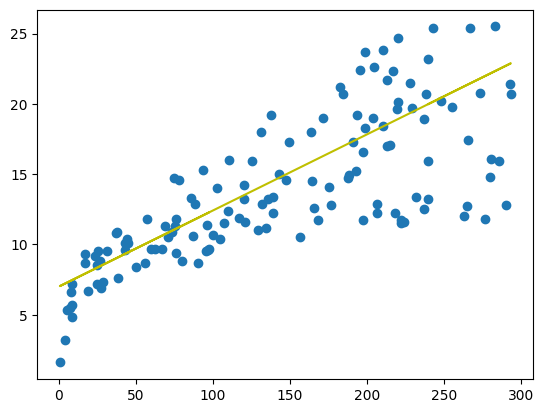

In [54]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [55]:
y_train_pred = model.predict(X_train_constant)
res = (Y_train - y_train_pred)
res

146   -4.999099
198    5.329047
51    -1.166502
38     0.830906
152    0.327425
         ...   
18     0.847794
87     3.666600
163    3.273177
156    3.728143
32    -2.121446
Name: Sales, Length: 134, dtype: float64

In [56]:
y_train_pred

array([18.19909918, 20.17095311, 11.8665016 ,  9.269094  , 16.27257522,
       17.65060647, 17.83645937, 16.60801704, 17.46928657, 20.27974505,
       13.79302556, 16.09578831,  8.5302154 , 17.31063166,  8.39422548,
        9.26456101, 15.83287445, 12.76403511,  8.45315445, 15.97793038,
       16.87093089, 17.14291075, 15.33877772,  8.09504764, 17.71860144,
       11.73504467, 18.11297222, 10.77858219, 14.822016  , 11.3180089 ,
        8.44862145,  8.74326629, 15.27984875, 17.07944878, 16.98878883,
       11.20015096,  8.61180936,  7.56015393, 13.40318777, 16.68961099,
       11.41320185, 16.34057018, 18.19909918, 12.18381143, 18.8926478 ,
       13.01334998, 20.49279593, 20.01683119, 16.33150419, 19.85817628,
       16.07312332, 10.9508361 , 20.59252188, 10.77858219, 14.77215303,
        9.33255597, 15.69688453,  8.08144865,  7.64628088, 12.80029909,
       18.3396221 , 14.94893993,  7.70974285, 17.27890067, 11.26814592,
       13.25813185,  7.66894587, 18.57533797, 19.35501355, 16.99

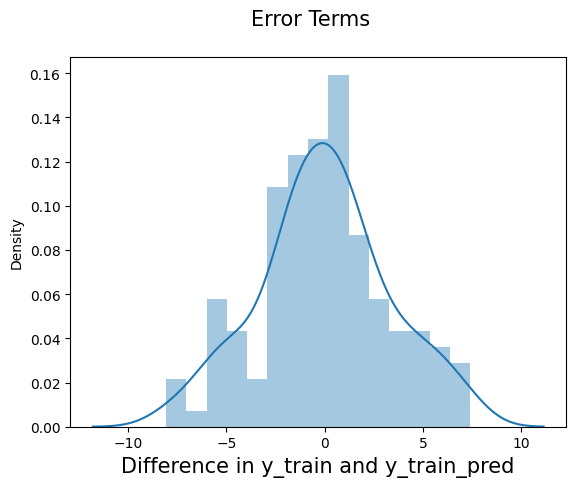

In [57]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

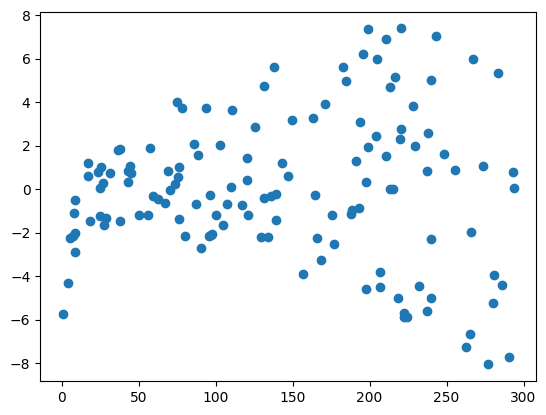

In [58]:
plt.scatter(X_train, res)
plt.show()

In [59]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [60]:
y_pred

array([20.07122716, 19.16009466, 13.67516762, 17.66420546, 16.37230116,
       20.7511768 , 17.21543871, 19.86724227, 10.73778521, 11.38147086,
        8.1675756 , 15.25265077, 16.4946921 ,  8.20383958, 17.18370772,
        8.19477359, 15.69688453, 14.18286335, 19.22355662,  7.84573277,
       15.82834146, 17.94525131, 10.77404919, 14.71775706, 18.68866291,
       10.71965322, 13.7204976 , 18.59346996,  9.74052575, 18.82011984,
       11.58545575, 12.29260337, 15.33877772,  7.91372774, 10.44314037,
       17.61434249,  9.10590609, 15.03053389,  9.50480988, 12.57364922,
        7.90919474, 20.35227301, 13.44398475, 10.41594238, 15.51103163,
       10.31168344, 20.20268409, 17.55088053,  8.12677862, 18.16283519,
       17.74579942, 13.63890364, 17.12477876, 12.89549204, 15.13479283,
       18.18550018, 16.81653492, 14.10580239, 17.0477178 , 10.3887444 ,
       18.27162714, 20.44746596, 14.87641197, 12.43312629,  8.09504764,
       16.37230116])

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [64]:
np.sqrt(mean_squared_error(Y_test, y_pred))

3.135994140360635

In [65]:
r2 = r2_score(Y_test, y_pred)
r2

0.6638192763773882

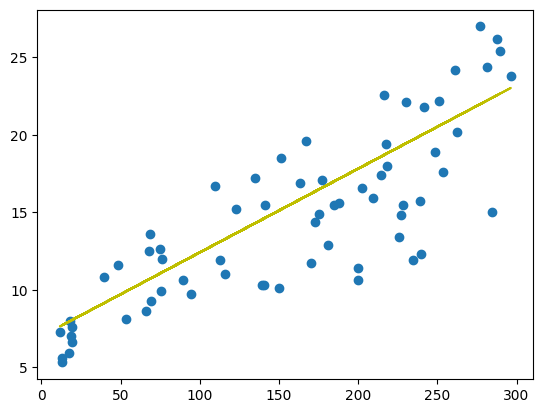

In [67]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.9955 +0.0541 * X_test, 'y')
plt.show()